In [2]:
import numpy as np 
import pandas as pd

In [4]:
#read the files 
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
all = [train_data,test_data]

In [6]:
#show the data 
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
for data in all:
    data.drop(['PassengerId','Name','Ticket'],axis = 1,inplace=True)



In [8]:
train_data.info()
print('*'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-nu

In [10]:
train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [11]:
for data in all:
    data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,NaN,S
1,1,1,1,38.0,1,0,71.2833,C85,C
2,1,3,1,26.0,0,0,7.9250,NaN,S
3,1,1,1,35.0,1,0,53.1000,C123,S
4,0,3,0,35.0,0,0,8.0500,NaN,S


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


In [13]:
for data in all:
    data.drop(['Cabin'],axis = 1,inplace= True)

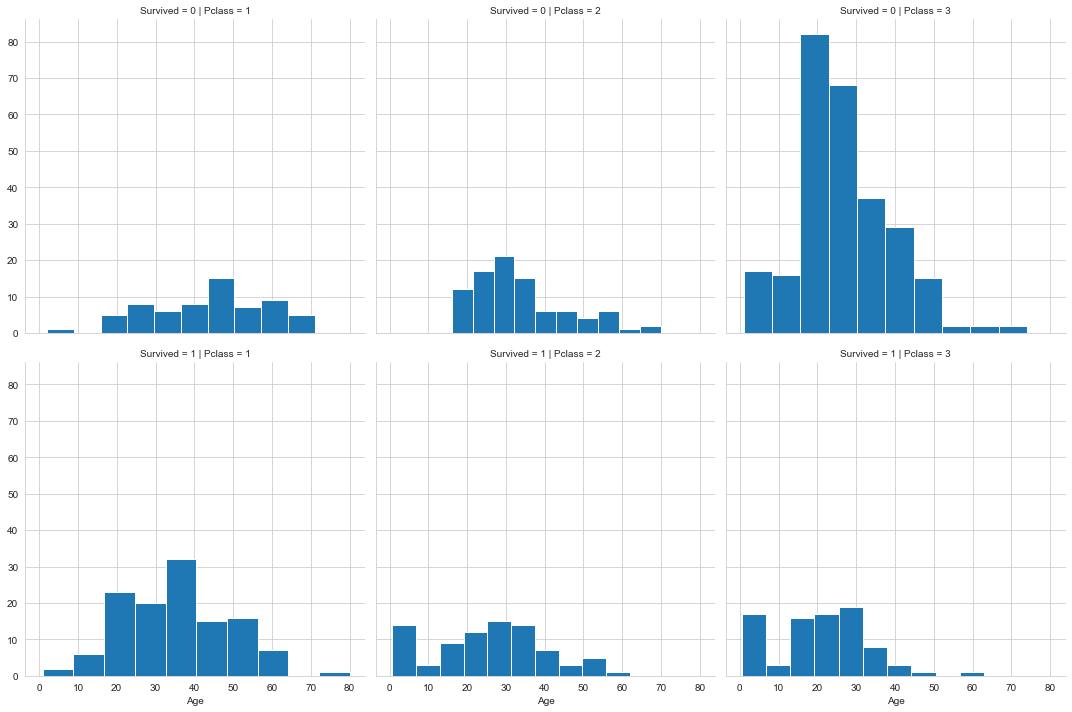

In [16]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
g = sns.FacetGrid(train_data,col = 'Pclass',height = 5,row = 'Survived')
g.map(plt.hist,'Age')

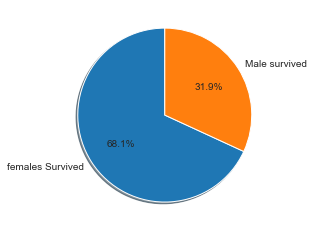

In [17]:
female = train_data[(train_data['Sex'] == 1) & (train_data['Survived'] == 1)]['Sex'].value_counts()[1]/train_data[(train_data['Survived'] == 1)]['Survived'].value_counts()[1]
male = train_data[(train_data['Sex'] == 0) & (train_data['Survived'] == 1)]['Sex'].value_counts()[0]/train_data[(train_data['Survived'] == 1)]['Survived'].value_counts()[1]
labels = ["females Survived",'Male survived']
fig1, ax1 = plt.subplots()
ax1.pie([female,male], labels=labels,shadow=True,startangle=90,autopct='%1.1f%%')
plt.show()



NOW! to the hard part we can replace the Nan in the age with mean of it which won't be accurate enought so here is an example of what i am going to do we can check the males in Pclass 1 for example and get the mean then replace the nan in that pclass 1 for males same for the rest



In [20]:
for data in all:
   for i in range(0,2):
      for j in range(1,4):     
          age_mean = data[(data['Sex'] == i) & (data['Pclass'] == j)]['Age'].dropna().mean()
          data.loc[ (data.Age.isnull()) & (data.Sex == i) & (data.Pclass == j),'Age'] = age_mean



In [21]:
train_data.info()
print('*'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 52.3+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      

now we only have nan left in Embarked in train data which is easy to replace by the mode and we have 1 missing vlaue in fare in test data


In [22]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data.Embarked.mode(dropna=True)[0])

In [23]:
test_data.loc[(data.Fare.isnull())]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,0,60.5,0,0,NaN,S


we can see that our missing value in PClass 3 will be replaced with the mean of Pclass 3

In [24]:
test_data['Fare'].fillna(test_data[(test_data['Pclass'] == 3)]['Pclass'].dropna().mean(),inplace = True)

In [25]:
for data in all:
    data['Family'] = data['Parch'] + data['SibSp'] + 1
    data.drop(['Parch','SibSp'],axis = 1,inplace = True)



In [26]:
train_data.info()
print('*'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Family    891 non-null    int64  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 45.4+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    object 
 5   Family    418 non-null    int64  
dtypes: float64

In [27]:


for data in all:
    data['Embarked'] = data['Embarked'].map( {'S': 1, 'C': 2,'Q' : 3} )

train_data.head()



,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,22.0,7.2500,1,2
1,1,1,1,38.0,71.2833,2,2
2,1,3,1,26.0,7.9250,1,1
3,1,1,1,35.0,53.1000,1,2
4,0,3,0,35.0,8.0500,1,1


now the data is ready to test it. for machine learning all data should be numeric.

In [28]:
X_train = train_data.drop(['Survived'],axis = 1)
y_train = train_data.Survived

In [29]:
from sklearn.preprocessing import StandardScaler
scalerModel = StandardScaler()
X_train = scalerModel.fit_transform(X_train)
test_data = scalerModel.fit_transform(test_data)



In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size = 0.21,shuffle = True,random_state=33)



In [31]:


train_scores = []
test_scores = []



In [32]:
from sklearn.svm import SVC


SVCModel = SVC(kernel= 'rbf',
               max_iter=3000,C=.10,gamma='auto')
SVCModel.fit(X_train, y_train)



print('train data score',SVCModel.score(X_train,y_train))
print('test data score',SVCModel.score(X_test,y_test))
train_scores.append(SVCModel.score(X_train,y_train))
test_scores.append(SVCModel.score(X_test,y_test))

train data score 0.8122332859174964
test data score 0.824468085106383
